# Proyek Analisis Data Bike Sharing
Nama : Muhammad Alfi Hidayat
Email : trsvalfi@gmail.com

# Pertanyaan Bisnis


1.   Bagaimana tren jumlah pengguna sepeda beberapa tahun terakhir?
2.   Bagaimana musim mempengaruhi persewaan sepeda
3.   Bagaimana perbandingan persewaan sepeda antara hari libur dan hari kerja
4.   Bagaimana pengaruh hari kerja terhadap kinerja bisnis bike sharing?





# Menyiapkan Library


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [29]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.26.4
2.1.4
3.7.1
0.13.1


# Data Wrangling


## Gathering Data

koneksi dengan penyimpanan googledrive

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


membuat path file, pastikan path file sesuai

In [31]:
file_day_csv = '/content/drive/MyDrive/BANGKIT/Dicoding/Analisis Data/Data/day.csv'
file_hour_csv = '/content/drive/MyDrive/BANGKIT/Dicoding/Analisis Data/Data/hour.csv'

read file csv menggunakan read_csv()

In [32]:
daydf = pd.read_csv(file_day_csv)
hourdf = pd.read_csv(file_hour_csv)

menampilkan daydf dan hourdf

In [33]:
daydf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
hourdf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Menilai Data daydf & hourdf

In [35]:
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terdapat kesalahan pada tipe data dari kolom **dteday** seharusnya date

In [36]:
hourdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terdapat kesalahan pada tipe data dari kolom **dteday** seharusnya date

### Mencari Missing Value

In [37]:
daydf.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tidak ada missing value

In [38]:
hourdf.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


tidak ada missing value

### Mencari Duplicate Value


In [39]:
print("Jumlah duplikasi: ", daydf.duplicated().sum())

Jumlah duplikasi:  0


tidak ada duplicate value

In [40]:
print("Jumlah duplikasi: ", hourdf.duplicated().sum())

Jumlah duplikasi:  0


tidak ada duplicate value

### Menampilkan ringkasan parameter statistik


In [41]:
daydf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada keanehan value


In [42]:
hourdf.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada keanehan value


# Cleaning Data


### Memperbaiki tipe data

In [43]:
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
daydf["dteday"] = pd.to_datetime(daydf["dteday"])

memperbaiki tipe data kolom **dteday** dari object menjadi datetime

In [45]:
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [46]:
hourdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [47]:
hourdf["dteday"] = pd.to_datetime(hourdf["dteday"])

memperbaiki tipe data kolom **dteday** dari object menjadi datetime

In [48]:
hourdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# Exploratory Data Analysis (EDA)

## Mengeksplore data daydf dan hourdf

In [49]:
daydf.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [65]:
hourdf.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,0.0,Sat,Workingday,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Mendefinisikan setiap kolom

In [50]:
daydf['mnth'] = daydf['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
daydf['season'] = daydf['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
daydf['weekday'] = daydf['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
daydf['weathersit'] = daydf['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

daydf['yr'] = daydf['yr'].map({
    0: '2011', 1: '2012'
})

daydf['workingday'] = daydf['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

In [51]:
daydf['season'] = daydf.season.astype('category')
daydf['yr'] = daydf.yr.astype('category')
daydf['mnth'] = daydf.mnth.astype('category')
daydf['holiday'] = daydf.holiday.astype('category')
daydf['weekday'] = daydf.weekday.astype('category')
daydf['workingday'] = daydf.workingday.astype('category')
daydf['weathersit'] = daydf.weathersit.astype('category')

daydf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
hourdf['mnth'] = hourdf['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hourdf['season'] = hourdf['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hourdf['weekday'] = hourdf['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hourdf['weathersit'] = hourdf['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hourdf['yr'] = hourdf['yr'].map({
    0: '2011', 1: '2012'
})

hourdf['workingday'] = hourdf['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

In [53]:
hourdf['season'] = hourdf.season.astype('category')
hourdf['yr'] = hourdf.yr.astype('category')
hourdf['mnth'] = hourdf.mnth.astype('category')
hourdf['holiday'] = hourdf.holiday.astype('category')
hourdf['weekday'] = hourdf.weekday.astype('category')
hourdf['workingday'] = hourdf.workingday.astype('category')
hourdf['weathersit'] = hourdf.weathersit.astype('category')

hourdf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


### Bagaimana tren jumlah pengguna sepeda beberapa tahun terakhir?

In [62]:
trend_by_year = daydf.groupby(by='yr').agg({
    'cnt':'mean'
})

trend_by_year.head()

<ipython-input-62-bceb468604d8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_by_year = daydf.groupby(by='yr').agg({


,cnt
yr,
2011,3405.761644
2012,5599.934426


Terlihat diatas merupakan total rental sepeda dari tahun 2011 sampai 2012

### Bagaimana musim mempengaruhi persewaan sepeda?

In [82]:
bike_rent_byseason = daydf.groupby(by='season').agg({
    'cnt':'sum'
})
bike_rent_byseason

<ipython-input-82-2918ecd959e4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_rent_byseason = daydf.groupby(by='season').agg({


,cnt
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


Terlihat dari penyewaan sepeda terbanyak ada pada musim gugur

### Bagaimana perbandingan persewaan sepeda antara hari libur dan hari kerja

In [81]:
weeday_weekend_comparison = daydf.groupby(by='weekday').agg({
    'cnt':'sum'
})

weeday_weekend_comparison

<ipython-input-81-555fd26011ce>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weeday_weekend_comparison = daydf.groupby(by='weekday').agg({


,cnt
weekday,
Fri,487790
Mon,455503
Sat,477807
Sun,444027
Thu,485395
Tue,469109
Wed,473048


Terlihat dari jumlah penyewaan sepeda pada hari libur lebih sedikit daripada hari kerja



### Bagaimana pengaruh hari kerja terhadap kinerja bisnis bike sharing?

In [69]:
by_workingday = daydf.groupby(by='workingday').agg({
    'cnt':'sum'
})

by_workingday

<ipython-input-69-2301026e2526>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_workingday = daydf.groupby(by='workingday').agg({


,cnt
workingday,
Holiday,1000269
Workingday,2292410


# Visualization & Explanatory Analysis

## Visualisasi 1 : Bagaimana tren jumlah pengguna sepeda beberapa tahun terakhir?

In [76]:
trend_by_year = trend_by_year.reset_index()
trend_by_year

,yr,cnt
0,2011,3405.761644
1,2012,5599.934426


<ipython-input-77-6f94ddb4cf71>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_df_per_yr = daydf.groupby(by=["mnth","yr"]).agg({


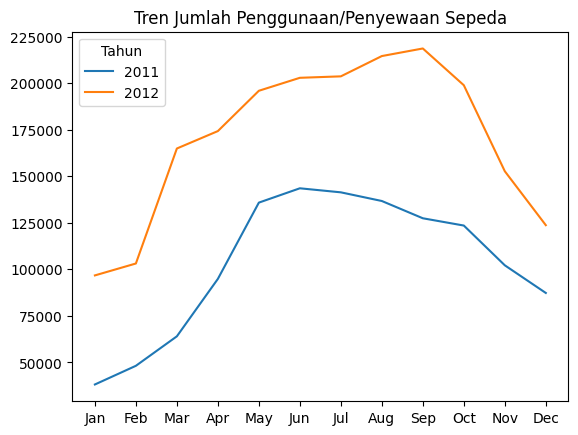

In [77]:
daydf['mnth'] = pd.Categorical(daydf['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_df_per_yr = daydf.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(data=monthly_df_per_yr, x="mnth", y="cnt", hue="yr")

plt.title("Tren Jumlah Penggunaan/Penyewaan Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper left")
plt.show()

## Visualisasi 2 : Bagaimana musim mempengaruhi persewaan sepeda?

In [78]:
bike_rent_byseason = bike_rent_byseason.reset_index()
bike_rent_byseason

,season,cnt
0,Fall,5644.303191
1,Spring,2604.132597
2,Summer,4992.331522
3,Winter,4728.162921


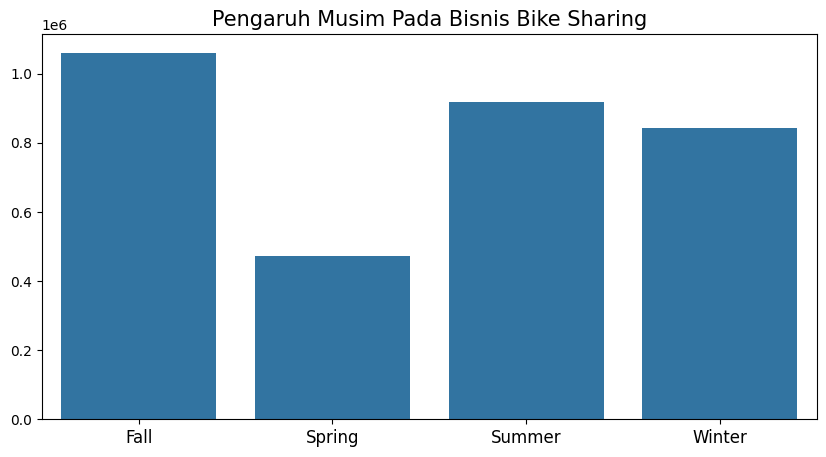

In [83]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    data= bike_rent_byseason.sort_values(by="season", ascending=False),
)
plt.title("Pengaruh Musim Pada Bisnis Bike Sharing", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Visualisasi 3 : Bagaimana perbandingan persewaan sepeda antara hari libur dan hari kerja

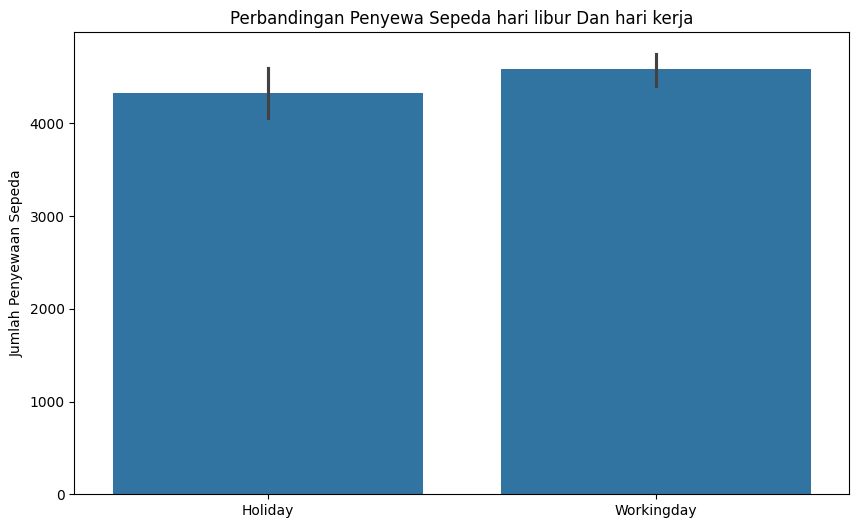

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='cnt',
    data=daydf)

plt.title('Perbandingan Penyewa Sepeda hari libur Dan hari kerja')
plt.xlabel(None)
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

## Visualisasi 4 : Bagaimana pengaruh hari kerja terhadap kinerja bisnis bike sharing?

In [87]:
by_workingday = by_workingday.reset_index()
by_workingday

,workingday,cnt
0,Holiday,1000269
1,Workingday,2292410


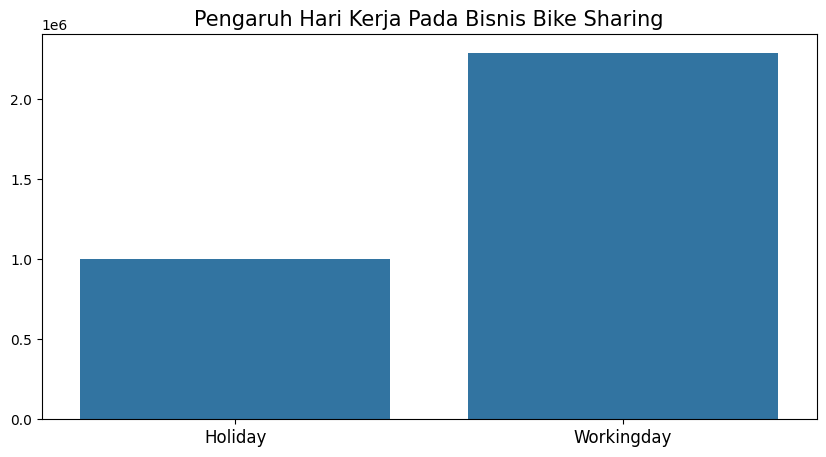

In [88]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="workingday",
    data=by_workingday.sort_values(by="workingday", ascending=False),
)
plt.title("Pengaruh Hari Kerja Pada Bisnis Bike Sharing", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

# Conclusion




1.   Tren dari penggunaan atau perentalan sepeda telah meningkat dari 2011 ke 2012, rental sepeda telah meningkat ketika pertengahan tahun, dan menurun pada awal tahun
2.   dapat disimpulkan bahwa musim tidak memiliki pengaruh yang signifikan pada performa bisnis penyewaan sepeda. setiap musim penyewaan sepeda meningkat sedikit, dimulai dari musim semi yang mana menunjukkan angka terkecil dan meningkat pada musim panas dan musim gugur yang mana angka tertinggi penggunaan sepeda, dari sini alokasi untuk sumber daya pada musim panas dan musim gugur dapat ditingkatkan
3.   dapat disimpulkan perbandingan dari hari libur dan hari kerja, dibuktikan bahwa penggunaan sepeda pada hari kerja adalah tertinggi, itu dibuktikan dengan orang-orang yang menggunakan sepeda untuk aktivitas sehari-hari
4.   dari hari kerja memiliki dampak yang signifikan terhadap penyewaan sepeda dengan angka tertinggi, kesimpulan ini dapat menjadi dasar strategi pemasaran untuk mengalokasikan sumber daya yang lebih untuk hari kerja



In [90]:
daydf.to_csv('/content/drive/MyDrive/BANGKIT/Dicoding/Analisis Data/Dashboard/daydf.csv', index=False)